#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\Hsu-Hui\.conda\envs\GIS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hsu-Hui\.conda\envs\GIS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hsu-Hui\.conda\envs\GIS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hsu-Hui\.conda\envs\GIS\lib\site-packages\tenso

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
categorical_crossentropy_model = Sequential()

In [8]:
#卷積層1

In [9]:
categorical_crossentropy_model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
categorical_crossentropy_model.add(Dropout(rate=0.25))

In [11]:
categorical_crossentropy_model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
categorical_crossentropy_model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
categorical_crossentropy_model.add(Dropout(0.25))

In [15]:
categorical_crossentropy_model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
categorical_crossentropy_model.add(Flatten())
categorical_crossentropy_model.add(Dropout(rate=0.25))

In [18]:
categorical_crossentropy_model.add(Dense(1024, activation='relu'))
categorical_crossentropy_model.add(Dropout(rate=0.25))

In [19]:
categorical_crossentropy_model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(categorical_crossentropy_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [21]:
try:
    categorical_crossentropy_model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [25]:
import keras
MSE_model= keras.models.clone_model(categorical_crossentropy_model)
binary_crossentropy_model= keras.models.clone_model(categorical_crossentropy_model)

categorical_crossentropy_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
MSE_model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
binary_crossentropy_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(history, para1, para2, para3=None, para4=None):
    if para3 == None or para4 == None:
        plt.figure(figsize=(6,4))
    else:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
    plt.plot(history.history[para1])
    plt.plot(history.history[para2])
    plt.title('Train History')
    plt.ylabel(para1)
    plt.xlabel('Epoch')
    plt.legend([para1, para2], loc='upper left')
    if para3 == None or para4 == None:
        plt.show()
    else:
        plt.subplot(122)
        plt.plot(history.history[para3])
        plt.plot(history.history[para4])
        plt.title('Train History')
        plt.ylabel(para3)
        plt.xlabel('Epoch')
        plt.legend([para3, para4], loc='upper left')
        plt.subplots_adjust(wspace =0.3, hspace =0)
        plt.show()



In [28]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history = [None]*3
test_history = [None]*3
for i, model in enumerate([categorical_crossentropy_model, MSE_model, binary_crossentropy_model]):
    train_history[i] = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     
    test_history[i] = model.evaluate(x_img_test_normalize, y_label_test_OneHot, batch_size=128, verbose=1, sample_weight=None)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 31s 814us/step - loss: 1.3192 - accuracy: 0.5302 - val_loss: 1.4002 - val_accuracy: 0.5464
Epoch 2/12
37500/37500 [==============================] - 32s 858us/step - loss: 1.2973 - accuracy: 0.5367 - val_loss: 1.3896 - val_accuracy: 0.5468
Epoch 3/12
37500/37500 [==============================] - 31s 836us/step - loss: 1.2780 - accuracy: 0.5448 - val_loss: 1.3344 - val_accuracy: 0.5588
Epoch 4/12
37500/37500 [==============================] - 31s 832us/step - loss: 1.2645 - accuracy: 0.5513 - val_loss: 1.3124 - val_accuracy: 0.5746
Epoch 5/12
37500/37500 [==============================] - 31s 814us/step - loss: 1.2384 - accuracy: 0.5583 - val_loss: 1.3026 - val_accuracy: 0.5700
Epoch 6/12
37500/37500 [==============================] - 31s 817us/step - loss: 1.2221 - accuracy: 0.5638 - val_loss: 1.2810 - val_accuracy: 0.5798
Epoch 7/12
37500/37500 [==============================] 

Loss function : categorical_crossentropy


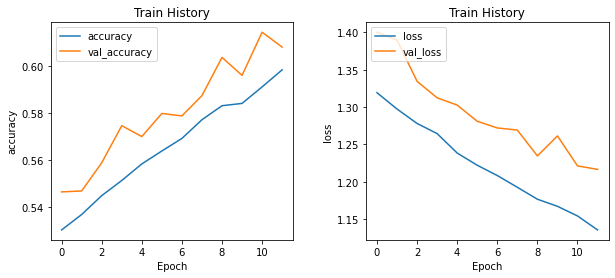

Test loss : 1.2068073902130128
Test acc  : 0.6011999845504761


Loss function : MSE


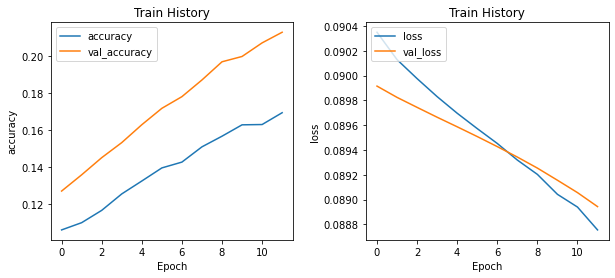

Test loss : 0.08895015709400177
Test acc  : 0.2150000035762787


Loss function : binary_crossentropy


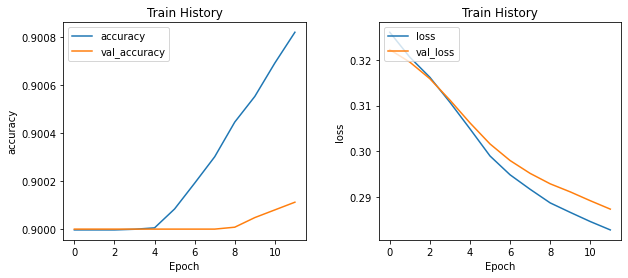

Test loss : 0.28626266841888426
Test acc  : 0.900080680847168




In [33]:
loss_f = ["categorical_crossentropy", "MSE", "binary_crossentropy"]

for i, name in enumerate(loss_f):
    print(f"Loss function : {name}")
    show_train_history(train_history[i],'accuracy','val_accuracy','loss','val_loss')
    #show_train_history(train_history[i],'loss','val_loss')   
    print(f"Test loss : {test_history[i][0]}")
    print(f"Test acc  : {test_history[i][1]}")
    print("\n")